# Water Pumps: EDA
## Business Problem:
Tanzania is a developing country and access to water is very important for the health of the population. For this reason, it is vital that all water pumps are properly working. Currently, the only way to monitor pump working status is by physically visiting the site. This is time consuming and costly. Therefore, a more intelligent solution to monitor water pump status is desirable.

This project will address the following question: How can the government of Tanzania improve water pump maintenance by knowing the pump functional status in advance?

## EDA
In this notebook I will:
1. Look for relationships between date recorded and geographical location.
2. Inspect distributions of numerical data.
3. Look for relations between groups of categorical data.

In [1]:
from collections import defaultdict
import sys
sys.path.append('..')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from src.viz import viz

%matplotlib inline

## Load Cleaned Data

In [2]:
df = pd.read_csv('../data/clean/cleaned_data.csv', index_col='id')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 74247
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59364 non-null  object 
 1   amount_tsh             59364 non-null  float64
 2   date_recorded          59364 non-null  object 
 3   funder                 59364 non-null  object 
 4   gps_height             59364 non-null  int64  
 5   installer              59364 non-null  object 
 6   longitude              59364 non-null  float64
 7   latitude               59364 non-null  float64
 8   wpt_name               59364 non-null  object 
 9   num_private            59364 non-null  int64  
 10  basin                  59364 non-null  object 
 11  subvillage             59364 non-null  object 
 12  region                 59364 non-null  object 
 13  region_code            59364 non-null  int64  
 14  district_code          59364 non-null  int64  
 15  lg

## Dates and Geographical location
As indicated during data wrangling, it appears that the geographical locations were recorded twice. I will investigate whether there is a relationship between when the record was made and the location.

In [4]:
geo_columns = ['longitude', 'latitude']
for column in geo_columns:
    print(df[column].value_counts().to_frame()[column].value_counts())

1       57443
2          72
1777        1
Name: longitude, dtype: int64
1       57445
2          71
1777        1
Name: latitude, dtype: int64


**Observations:**
* The majority of the geographical locations are unique.
* 71 geographical locations are recorded twice.
    * Could these pumps have been recorded on different days?
* One geographical location was recorded 1777 times.
    * This seems suspicious and is worth investigating.

In [5]:
geo_columns = ['longitude', 'latitude']
for column in geo_columns:
    print(df[column].value_counts().to_frame())

           longitude
0.000000        1777
33.010510          2
39.095087          2
39.099069          2
39.085965          2
...              ...
31.789709          1
37.095085          1
39.183964          1
34.341160          1
35.256844          1

[57516 rows x 1 columns]
               latitude
-2.000000e-08      1777
-2.465246e+00         2
-6.957328e+00         2
-6.991294e+00         2
-2.490324e+00         2
...                 ...
-3.263586e+00         1
-9.564592e+00         1
-8.519241e+00         1
-9.342734e+00         1
-2.598965e+00         1

[57517 rows x 1 columns]


**Question:** Does the geographical coordinate that was recorded 1777 times even fall within the borders of Tanzania?

A Google map inspection reveals that these coordinates fall within the Atlantic Ocean! Therefore, they must have been used to indicate pumps with missing geographical information.

In [6]:
1777 / len(df)

0.0299339667138333

Less than three percent of the pumps are missing geographical locations. This is small, but not insignificant.

## Data types
Inspecting the dataset above reveals that the categorical variable data types were lost when converting the file to a csv file. I will re-add them here.

In [7]:
categorical_vars = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code',
                   'lga', 'ward', 'public_meeting', 'permit', 'construction_year',
                   'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group',
                   'payment_type', 'water_quality', 'quality_group', 'quantity_group', 'source', 'source_type', 
                    'source_class', 'waterpoint_type', 'waterpoint_type_group', 'scheme_management', 'status_group', 
                   'payment', 'quantity']

In [8]:
categorical_dict = {x: 'category' for x in categorical_vars}

In [9]:
df = df.astype(categorical_dict)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59364 entries, 0 to 74247
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   status_group           59364 non-null  category
 1   amount_tsh             59364 non-null  float64 
 2   date_recorded          59364 non-null  object  
 3   funder                 59364 non-null  category
 4   gps_height             59364 non-null  int64   
 5   installer              59364 non-null  category
 6   longitude              59364 non-null  float64 
 7   latitude               59364 non-null  float64 
 8   wpt_name               59364 non-null  category
 9   num_private            59364 non-null  int64   
 10  basin                  59364 non-null  category
 11  subvillage             59364 non-null  category
 12  region                 59364 non-null  category
 13  region_code            59364 non-null  category
 14  district_code          59364 non-null 

In [11]:
def check_for_zero_categories(df):
    
    cat_list = df.select_dtypes(include=['category']).columns.to_list()
    
    for cat_var in cat_list:
        cat_values_counts = df[cat_var].value_counts()
        zero_cats = cat_values_counts[cat_values_counts < 1]
        if len(zero_cats) > 0:
            print(zero_cats)

In [12]:
check_for_zero_categories(df)

## Distributions of numerical variables
I will now explore relationshipst between the numerical variables.

**Plan:**
1. Create list of numerical column names.
2. Plot ECDF plots to visualize distributions. Use subplots.

In [13]:
num_cols_list = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

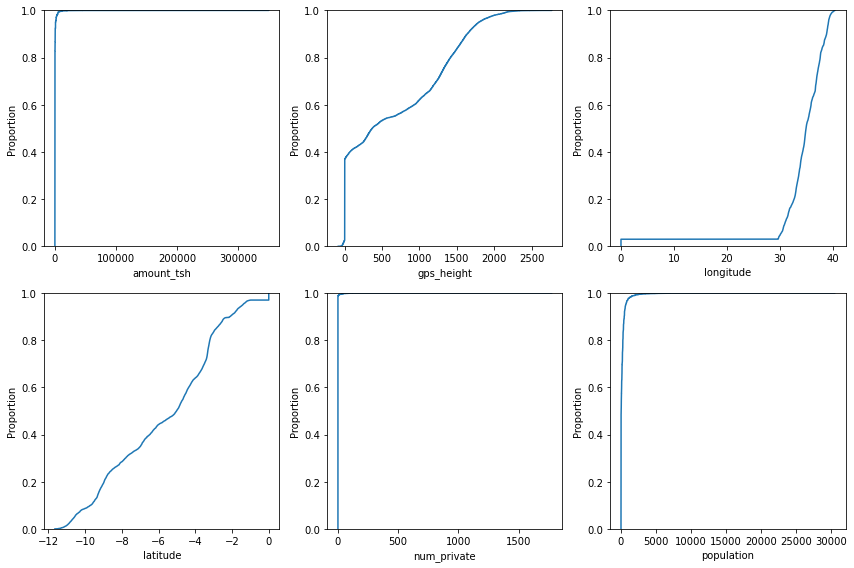

In [14]:
viz.plot_ecdfs(df, num_cols_list, 3)

**Observations:**
The ECDFs show many values near zero for `amount_tst`, `gps_height`, `longitude`, `num_private`, and `population`.

### Zero values
I will inspect the fraction of zero values for each numerical variable.

In [15]:
print('Zero Fractions:')
for column in num_cols_list:
    zero_frac = len(df[df[column] == 0.0]) / len(df)
    print(f' * {zero_frac:0.2%} of values for {column} are 0.')

Zero Fractions:
 * 70.08% of values for amount_tsh are 0.
 * 34.37% of values for gps_height are 0.
 * 2.99% of values for longitude are 0.
 * 0.00% of values for latitude are 0.
 * 98.72% of values for num_private are 0.
 * 35.96% of values for population are 0.


**Plan:**
1. Drop the columns `amount_tsh` and `num_private`. Over 50% of the values for these colums are zero and so they add little information.
2. Drop rows with zero population. In a future analysis, these missing values might be able to be derived from geographical location and Tanzanian census data.

In [16]:
df_clean = df.copy()

In [17]:
df_clean.drop(columns=['amount_tsh', 'num_private'], inplace=True)
num_cols_list.remove('amount_tsh')
num_cols_list.remove('num_private')

In [18]:
df_clean = df_clean[df_clean['population'] != 0.0]

In [19]:
print('Zero Fractions (after dropping columns and rows):')
for column in num_cols_list:
    zero_frac = len(df_clean[df_clean[column] == 0.0]) / len(df_clean)
    print(f' * {zero_frac:0.2%} of values for {column} are 0.')

Zero Fractions (after dropping columns and rows):
 * 2.03% of values for gps_height are 0.
 * 0.00% of values for longitude are 0.
 * 0.00% of values for latitude are 0.
 * 0.00% of values for population are 0.


Now there are only 2% of the values that are missing heights.

Plot the ECDFs again, but with the updated dataset.

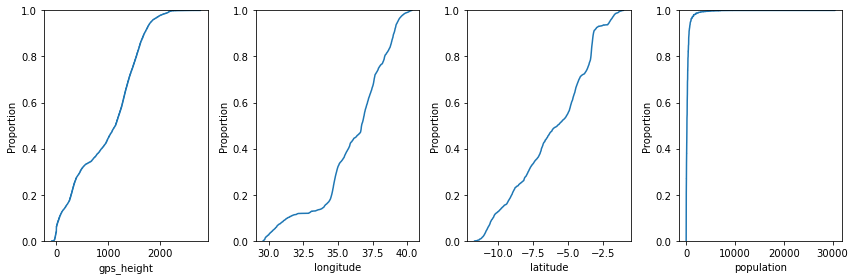

In [20]:
viz.plot_ecdfs(df_clean, num_cols_list, 4)

**Observations:** The variable `population` show CDFs that is heavily skewed towards zero.

One way to deal with these skewed values is to rescale these variables using a log function. I will do this and then relook at the distributions.

In [21]:
df_clean['log_population'] = np.log(df_clean['population'])

In [22]:
num_cols_list = [f'log_{x}' if x == 'population' else x for x in num_cols_list]

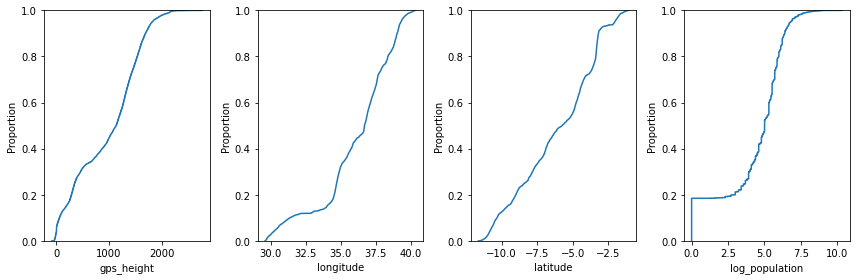

In [23]:
viz.plot_ecdfs(df_clean, num_cols_list, 4)

In [24]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
gps_height,38019.0,969.889634,612.544787,-90.000000,347.000000,1135.000000,1465.000000,2770.000000
longitude,38019.0,36.074387,2.586779,29.607122,34.715340,36.706815,37.940149,40.345193
latitude,38019.0,-6.139781,2.737733,-11.649440,-8.388839,-5.750877,-3.597016,-1.042375
population,38019.0,281.087167,564.687660,1.000000,40.000000,150.000000,324.000000,30500.000000
log_population,38019.0,4.269220,2.261806,0.000000,3.688879,5.010635,5.780744,10.325482


**Observations:**
That looks much better.
* `log_population`
    * There are a few, very small values, but then a nice, normal-looking curve afterwards.

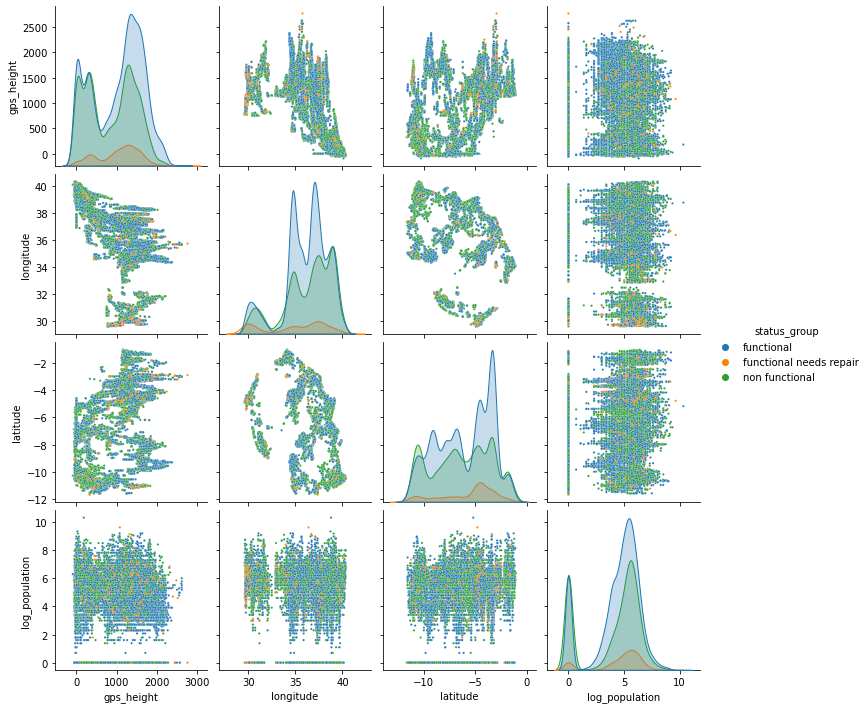

In [25]:
sns.pairplot(df_clean[num_cols_list+['status_group']], hue='status_group', plot_kws={"s": 5})
plt.show()

**Observations:**
There are population values with a log of 0, which corresponds to a population of 1. These must also indicate missing population values. I will remove rows with a population of 1 as well.

In [26]:
df_clean = df_clean[df_clean['log_population'] > 0]

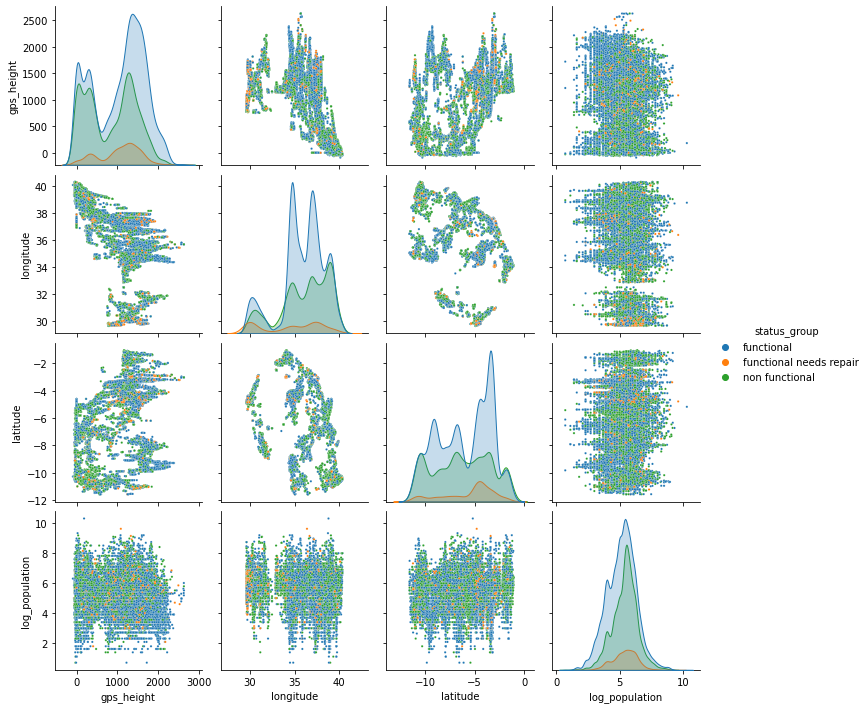

In [27]:
sns.pairplot(df_clean[num_cols_list+['status_group']], hue='status_group', plot_kws={"s": 5})
plt.show()

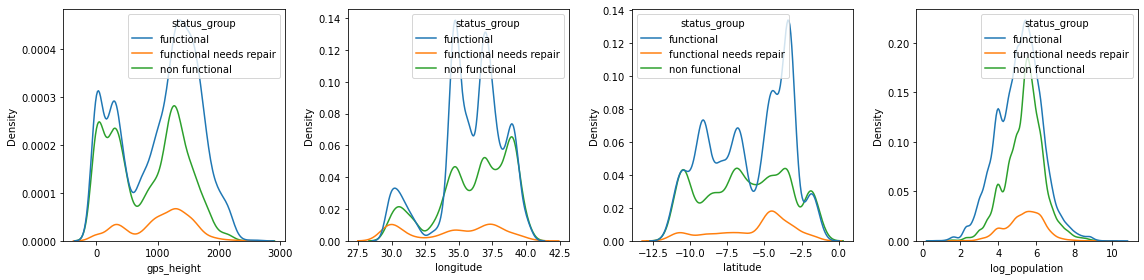

In [28]:
viz.plot_kdes(df_clean, num_cols_list, 4)

**Observations:**
1. The distribution in numerical values looks much more reasonable, with no missing values.
2. There are no obvious trends between numerical variables nor trends with the response variable, `status_group`.

### Population vs Location:

**Question:**
How does population relate to geographical location?

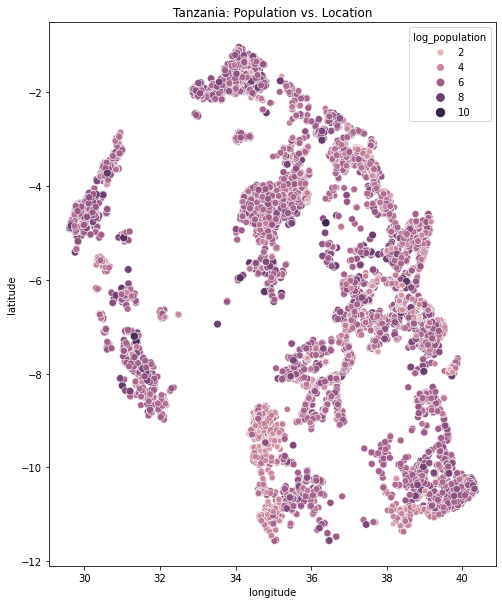

In [29]:
fix, ax = plt.subplots(figsize=(8, 10))
sns.scatterplot(x='longitude', y='latitude', size='log_population', hue='log_population', data=df_clean, ax=ax)
ax.set_title('Tanzania: Population vs. Location')
plt.show()

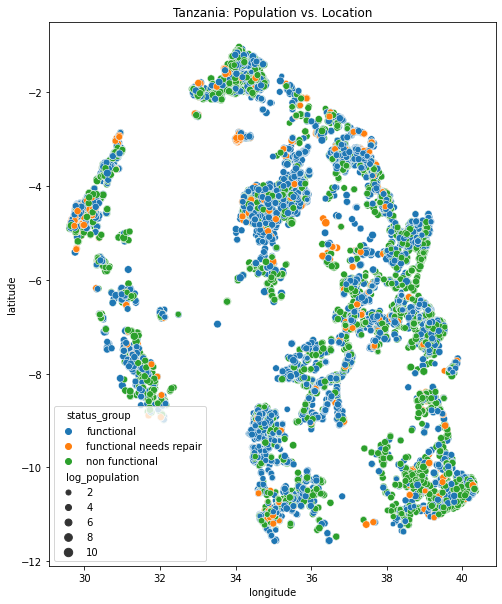

In [30]:
fix, ax = plt.subplots(figsize=(8, 10))
sns.scatterplot(x='longitude', y='latitude', size='log_population', hue='status_group', data=df_clean, ax=ax)
ax.set_title('Tanzania: Population vs. Location')
plt.show()

**Observations:**
* There are more non-functional water pumps in the southeast.
* Functional water pumps apear to concentrate along the middle of the country.

## Summarizing Categorical Data
Next, I will investigate relationships with the categorical variables.

In [31]:
categorical_columns = df_clean.select_dtypes(include=['category']).columns.tolist()

In [32]:
df_clean.loc[:, categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30994 entries, 1 to 74247
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   status_group           30994 non-null  category
 1   funder                 30994 non-null  category
 2   installer              30994 non-null  category
 3   wpt_name               30994 non-null  category
 4   basin                  30994 non-null  category
 5   subvillage             30994 non-null  category
 6   region                 30994 non-null  category
 7   region_code            30994 non-null  category
 8   district_code          30994 non-null  category
 9   lga                    30994 non-null  category
 10  ward                   30994 non-null  category
 11  public_meeting         30994 non-null  category
 12  scheme_management      30994 non-null  category
 13  permit                 30994 non-null  category
 14  construction_year      30994 non-null 

In [33]:
def compute_categorical_counts(df, columns_to_drop=None, print_counts=False):
    categorical_columns = df.select_dtypes(include=['category']).columns.tolist()
    # category_counts = {column:len(df[column].value_counts()) for column in categorical_columns}
    category_counts = {column:len(df[column].unique()) for column in categorical_columns}
    sorted_keys = sorted(category_counts, key=category_counts.get, reverse=True)
    category_counts_sorted = {x:category_counts[x] for x in sorted_keys}
    s_cat_count = pd.Series(category_counts_sorted)
    if columns_to_drop is not None:
        s_cat_count.drop(columns_to_drop, inplace=True)
    if print_counts:
        print('Category Counts:')
        print(s_cat_count)
    return s_cat_count

In [34]:
s_cat_count = compute_categorical_counts(df_clean, columns_to_drop=['status_group'], print_counts=True)

Category Counts:
wpt_name                 20667
subvillage               10038
installer                 1472
funder                    1325
ward                      1219
lga                         81
construction_year           55
region_code                 24
district_code               18
extraction_type             18
region                      17
extraction_type_group       13
scheme_management           12
management                  12
source                      10
basin                        9
water_quality                8
extraction_type_class        7
payment                      7
payment_type                 7
source_type                  7
waterpoint_type              7
quality_group                6
waterpoint_type_group        6
management_group             5
quantity                     5
quantity_group               5
source_class                 3
public_meeting               2
permit                       2
dtype: int64


### Related Catergorical variables
Inspecting the catergorical variables and their counts above, the following pairs of variables appear to be related:
* `district_code`, `region`
* `region_code`, `region`
* `extraction_type`, `extraction_type_group`, `extraction_type_class`
* `scheme_management`, `management`
* `source`, `source_type`, `source_class`.
* `payment`, `payment_type`
* `waterpoint_type`, `waterpoint_type_group`
* `management`, `management_group`
* `quantity`, `quantity_group`

In [35]:
column_pairs = [
    ['district_code', 'region'],
    ['region', 'region_code'],
    ['extraction_type_class', 'extraction_type_group'],
    ['extraction_type_group', 'extraction_type'],
    ['scheme_management', 'management'],
    ['scheme_management', 'management_group'],
    ['management', 'management_group'],
    ['source', 'source_type'],
    ['source_type', 'source_class'],
    ['payment', 'payment_type'],
    ['waterpoint_type_group', 'waterpoint_type'],
    ['quantity_group', 'quantity']
]

In [36]:
for column_pair in column_pairs:
    count_series = df.groupby(column_pair[0]).apply(lambda x: len(x[column_pair[1]].unique()))
    value_series = df.groupby(column_pair[0]).apply(lambda x: x[column_pair[1]].unique().astype('str'))
    df_cat_summary = pd.DataFrame({f'{column_pair[1]}_count': count_series, f'{column_pair[1]}_values': value_series})
    print(df_cat_summary)

               region_count                                      region_values
district_code                                                                 
0                         1                                           [Dodoma]
1                        21  [Dodoma, Mtwara, Morogoro, Kigoma, Ruvuma, Tan...
2                        19  [Mwanza, Ruvuma, Arusha, Kigoma, Dar es Salaam...
3                        20  [Tabora, Shinyanga, Dodoma, Tanga, Ruvuma, Kil...
4                        18  [Iringa, Dodoma, Mbeya, Kilimanjaro, Mtwara, T...
5                        13  [Kilimanjaro, Dodoma, Tanga, Shinyanga, Mwanza...
6                        12  [Arusha, Morogoro, Tanga, Mwanza, Mbeya, Kilim...
7                         8  [Arusha, Iringa, Mbeya, Kilimanjaro, Mwanza, K...
8                         4                 [Kagera, Shinyanga, Tanga, Mwanza]
13                        1                                            [Lindi]
23                        1                         

**Observations:**
* The following pairs of categorical variables show one-to-one relationships:
    * `management`, `management_group`
    * `payment`, `payment_type`
    * `quantity`, `quantity_group`
* These pairs of categorical variables do not show one-to-one relationships:
    * `district_code`, `region`
    * `region_code`, `region`
    * `extraction_type`, `extraction_type_group`, `extraction_type_class`
    * `scheme_management`, `management`
    * `source`, `source_type`, `source_class`.
    * `waterpoint_type`, `waterpoint_type_group`
* `scheme_management` shows many inconsistancies with `management` and `management_group`.
    
**Plan:**
1. For the one-to-one categorical variables, remove one of the columns to eliminate redundancy in the dataset.
2. For the additional categorical variables, select the variable that is most general in order to keep the model simple. If more information is needed, the more granular variables can be added back later. Evenso, there a couple of more granular columns that I would like to keep as I believe they will be more informative:
    * `source_type`
    * `waterpoint_type`
    * `region`
3. Leave in `scheme_management` since I am not sure which management column to trust.


#### Fix redundacies

In [37]:
redundant_columns = ['management', 'payment', 'quantity']
df_clean.drop(columns=redundant_columns, inplace=True)

#### Remove granular columns

In [38]:
granular_columns = ['region_code', 'extraction_type_class', 'extraction_type_group', 'source', 'source_class', 'waterpoint_type_group', 
                    'district_code']
df_clean.drop(columns=granular_columns, inplace=True)

#### Uninformative columns
There are some columns that reference names. These will not be useful in making predictions, so I will remove them. These include:
* `funder`
* `installer`
* `wpt_name`

In [39]:
name_columns = ['funder', 'installer', 'wpt_name']
df_clean.drop(columns=name_columns, inplace=True)

#### Redundant location information

In [40]:
location_columns = ['basin', 'subvillage', 'region', 'lga', 'ward']

In [41]:
print('First few values for each location column:')
for column in location_columns:
    first_few_values = df_clean[column].unique().to_list()[:10]
    print(f'{column}: {first_few_values}')

First few values for each location column:
basin: ['Rufiji', 'Pangani', 'Wami / Ruvu', 'Ruvuma / Southern Coast', 'Lake Tanganyika', 'Internal', 'Lake Victoria', 'Lake Nyasa', 'Lake Rukwa']
subvillage: ['Magoda C', 'Urereni', 'Mwandege', 'Sokoni', 'Moivaro', 'Seuli', 'Mwenge', 'Gwandamula', 'Mtaa Wa Tungini', 'Mbuyuni Juu']
region: ['Iringa', 'Kilimanjaro', 'Pwani', 'Tanga', 'Arusha', 'Mtwara', 'Kigoma', 'Dar es Salaam', 'Morogoro', 'Ruvuma']
lga: ['Njombe', 'Hai', 'Mkuranga', 'Pangani', 'Meru', 'Arusha Rural', 'Mtwara Rural', 'Kasulu', 'Ilala', 'Kilosa']
ward: ['Uwemba', 'Masama Magharibi', 'Vikindu', 'Mkalamo', 'Nkoanrua', 'Oltrumet', 'Njengwa', 'Janda', 'Chanika', 'Ulaya']


In [42]:
_ = compute_categorical_counts(df_clean[location_columns], print_counts=True)

Category Counts:
subvillage    10038
ward           1219
lga              81
region           17
basin             9
dtype: int64


**Observations:**
The columns `ward` and `subvillage` are very granular. I will remove them.

The additional location information could be useful, so I will keep it.

In [43]:
location_columns_to_drop = ['ward', 'subvillage']
df_clean.drop(columns=location_columns_to_drop, inplace=True)

In [44]:
_ = compute_categorical_counts(df_clean, print_counts=True)

Category Counts:
lga                  81
construction_year    55
extraction_type      18
region               17
scheme_management    12
basin                 9
water_quality         8
payment_type          7
source_type           7
waterpoint_type       7
quality_group         6
management_group      5
quantity_group        5
status_group          3
public_meeting        2
permit                2
dtype: int64


Now that I have removed unnecessary categorical columns, I can encode them as numerical values for modeling.

#### Check for zero categories
I will now recheck for any categorical variables with zero values for catergories.

In [45]:
check_for_zero_categories(df_clean)

Tabora    0
Kagera    0
Dodoma    0
Mbeya     0
Name: region, dtype: int64
Bukoba Rural       0
Igunga             0
Geita              0
Bahi               0
Biharamulo         0
Dodoma Urban       0
Chunya             0
Chato              0
Bukoba Urban       0
Ileje              0
Karagwe            0
Chamwino           0
Kahama             0
Bukombe            0
Uyui               0
Kishapu            0
Mpwapwa            0
Tabora Urban       0
Sikonge            0
Siha               0
Shinyanga Urban    0
Shinyanga Rural    0
Sengerema          0
Rungwe             0
Nzega              0
Nyamagana          0
Ngara              0
Muleba             0
Mufindi            0
Monduli            0
Kondoa             0
Missungwi          0
Misenyi            0
Meatu              0
Urambo             0
Mbeya Rural        0
Mbarali            0
Maswa              0
Makete             0
Magu               0
Kyela              0
Kwimba             0
Kongwa             0
Mbozi              0
N

**Observations:**
The `region` and `lga` columns both show categories with zero values. These categories could be empty after the data cleaning done during the categorical analysis done above. I will remove any empty category.

In [46]:
df_clean['lga'] = df_clean['lga'].cat.remove_unused_categories()
df_clean['region'] = df_clean['region'].cat.remove_unused_categories()

In [47]:
check_for_zero_categories(df_clean)

### Encoding Categorical Variables
During modeling, categorical variables will need to be turned into numerical values. I will do this in two steps. First, I will encode all categories for each categorical variable as a number. This will make it easier during visualizations of categorical variable distributions. It will also make it easier for labeling the one-hot-encoded columns.

#### Label Categorical Variables
I will map each categorical variable to a number using scikit-learn's `LabelEncoder()`.

In [48]:
cat_cols_list = df_clean.select_dtypes(include=['category']).columns.to_list()

In [49]:
label_cols_list = [f'{x}_label' for x in cat_cols_list]

In [50]:
for column in cat_cols_list:
    encode_cats = LabelEncoder()
    df_clean[f'{column}_label'] = encode_cats.fit_transform(df_clean[column])

In [51]:
def map_labels(cat_list):
    cat_label_map = {}
    for column in cat_list:
        encode_cats = LabelEncoder()
        unique_cats = df_clean[column].unique().tolist()
        unique_labels = encode_cats.fit_transform(unique_cats).tolist()
        cat_label_map[column] = {k:v for k, v in zip(unique_labels, unique_cats)}
    return cat_label_map

In [52]:
cat_label_map = map_labels(cat_cols_list)

In [53]:
df_clean = df_clean.astype({x:'category' for x in label_cols_list})

In [54]:
s_cat_label_count = compute_categorical_counts(df_clean[label_cols_list], print_counts=True)

Category Counts:
lga_label                  81
construction_year_label    55
extraction_type_label      18
region_label               17
scheme_management_label    12
basin_label                 9
water_quality_label         8
payment_type_label          7
source_type_label           7
waterpoint_type_label       7
quality_group_label         6
management_group_label      5
quantity_group_label        5
status_group_label          3
public_meeting_label        2
permit_label                2
dtype: int64


#### Categorical Variable Distributions
Using box plots, I will inspect the distributions of the categorical variables with respect to the response variable, `status_group`.

For any categorical variable with over 1000 categories, visualizing relationships with the response variable will be too difficult using histograms. Therefore, I will restrict histograms to any categorical variable with fewer than 1000 categories.

In [55]:
label_cols_list = [x for x in df_clean.columns.tolist() if 'label' in x]

In [56]:
label_cols_list.remove('status_group_label')

In [59]:
del s_cat_label_count['status_group_label']

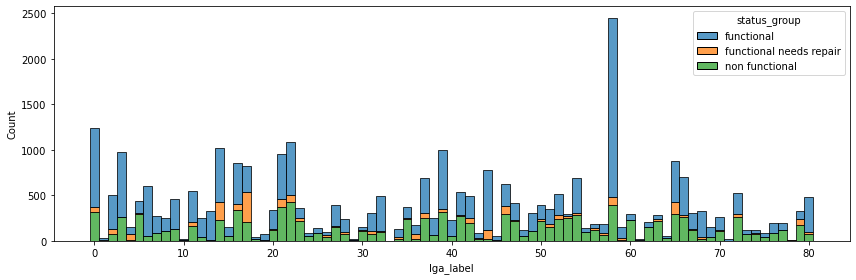

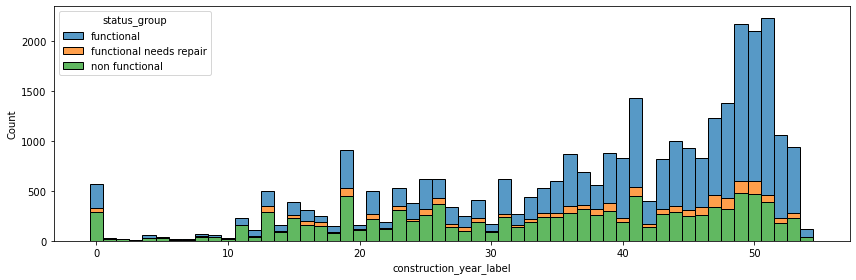

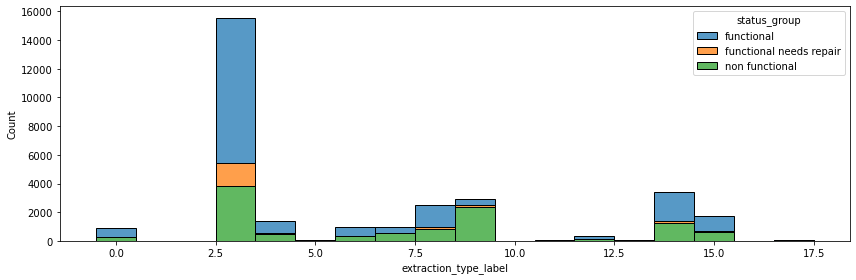

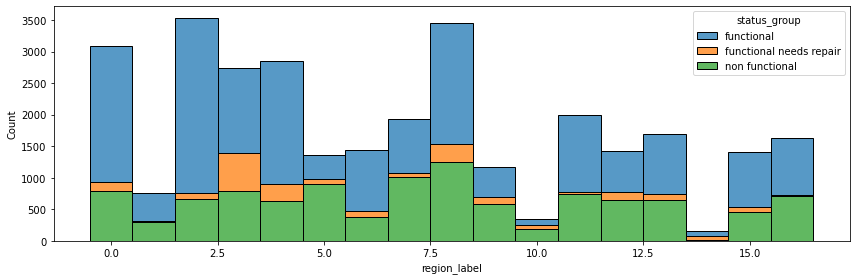

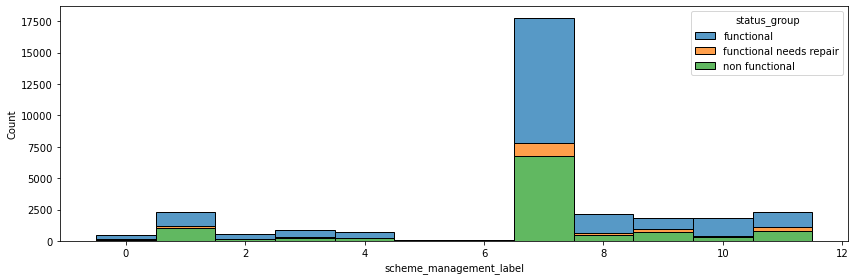

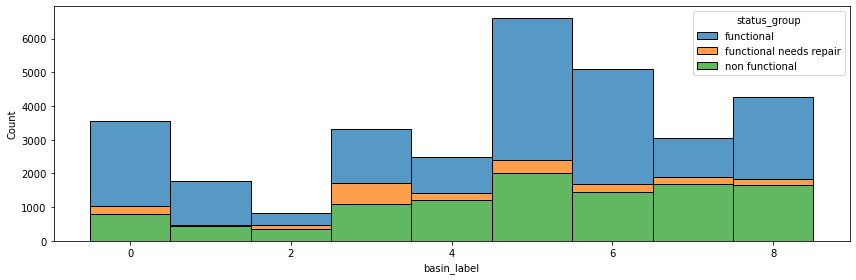

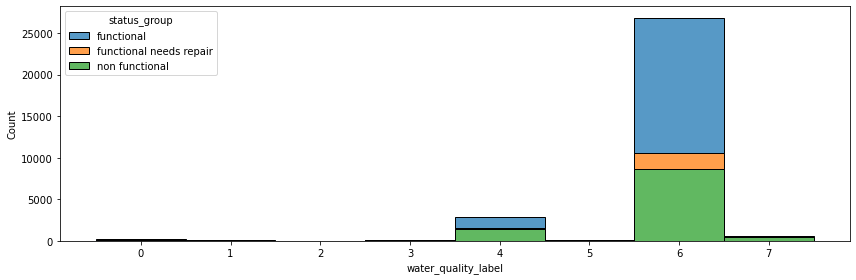

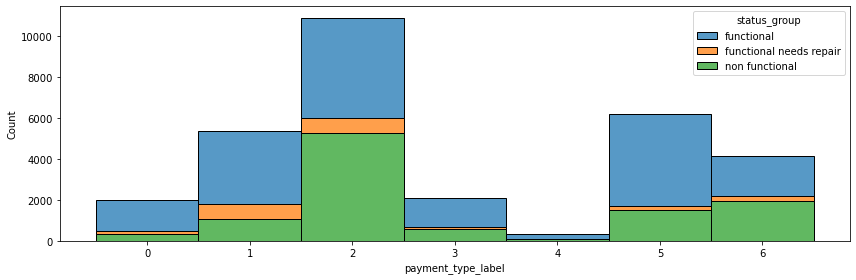

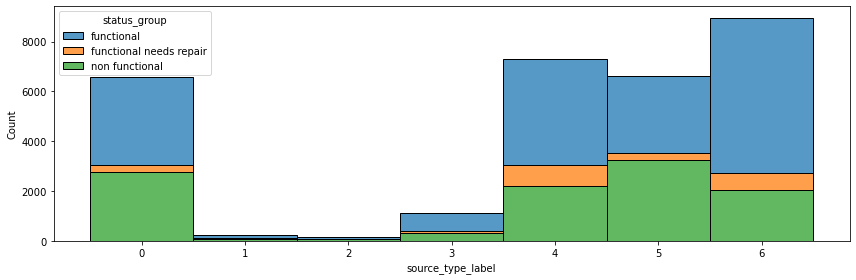

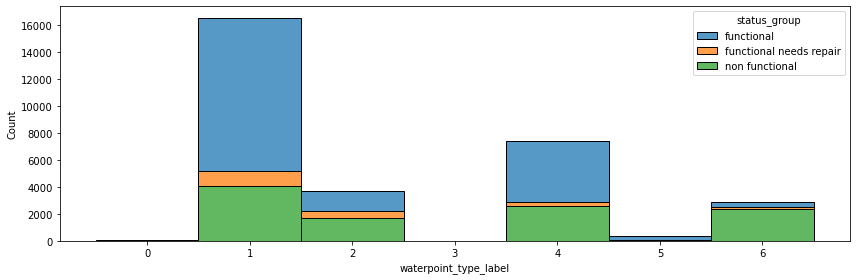

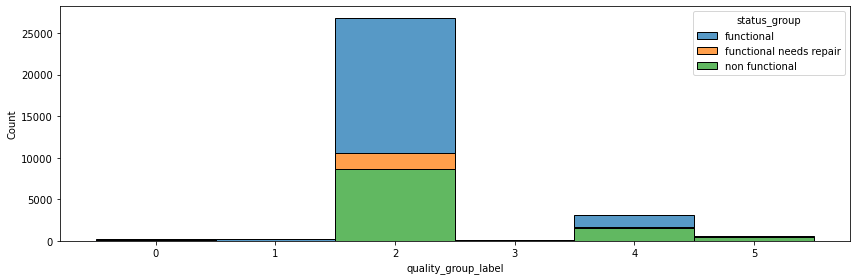

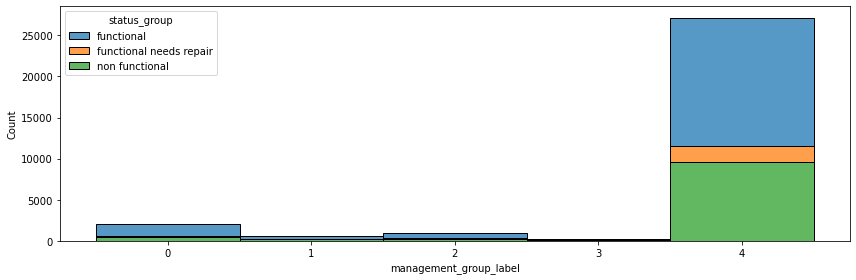

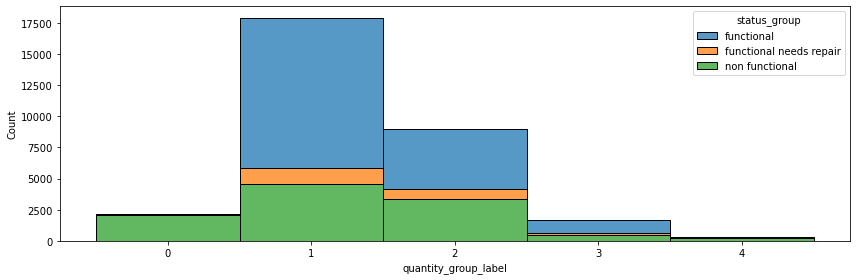

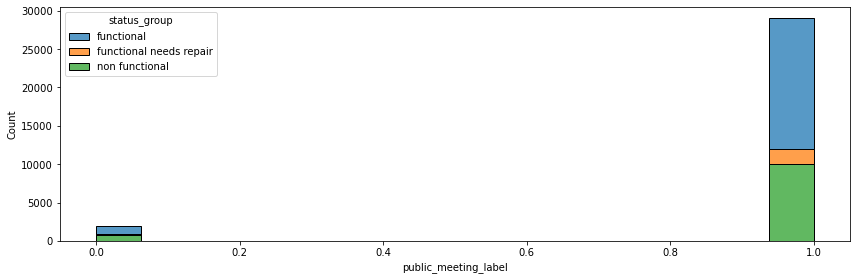

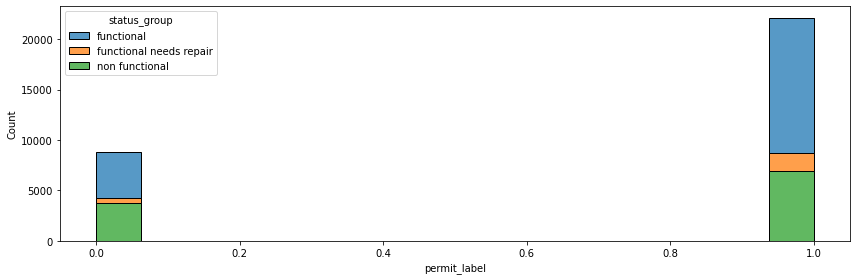

In [60]:
viz.plot_cat_hists(df_clean.loc[:, label_cols_list+['status_group']], s_cat_label_count, 1000, min_count=2, response_var='status_group')

**Observations:**
* `year`
    * There are many zero values for year.
* Payment appears to be a big factor on whether the pump is working or not. There is a larger fraction of non-functional water pumps for users who haven't paid.

In [61]:
zero_year_fraction = np.sum(df_clean['construction_year'].cat.codes.values == 0)/len(df_clean)
print(f'The percent of construction years that are zero is {zero_year_fraction:0.2%}.')

The percent of construction years that are zero is 1.84%.


I will drop rows that do not have any construction year information.

In [62]:
df_clean = df_clean.loc[df_clean['construction_year'].cat.codes.values != 0, :]

**Obsesrvations:**
* The *functional needs repair* status group only cosists of 7% of the dataset.

#### One-Hot Encode
One-hot encode the labeled categorical variables.

In [63]:
labeled_columns = [x for x in df_clean.columns if 'label' in x]

One-hot encode the labeled categorical columns.

In [64]:
df_clean = pd.get_dummies(df_clean, columns=labeled_columns, drop_first=True)

In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30423 entries, 1 to 74247
Columns: 250 entries, status_group to waterpoint_type_label_6
dtypes: category(16), float64(3), int64(2), object(1), uint8(228)
memory usage: 8.7+ MB


### Response Variable

In [66]:
df_clean['status_group'].value_counts(normalize=True)

functional                 0.586103
non functional             0.343227
functional needs repair    0.070670
Name: status_group, dtype: float64

**Observation:** The *funcional_needs_repair* catergory of the reponse variable `status_group` consists of very few values.

## Save Dataset
I will save the updated dataset to file.

In [67]:
df_clean.to_csv('../data/clean/eda_data.csv', index=False)

## Summary
In this notebook, I investigated the numerical and categorical variables in the waterpump dataset. I made the following observations:
* numerical variables:
    * Missing values
        * Removed the columns `amount_tsh` and `num_private` which contained over 50% of missing values.
        * Removed rows with missing `population` data. In a future project, this information can be derived from Tanzanian census data.
    * Distributions
        * The values for `population` were heavily skewed towards large values. I perform a log transform on this column to make the distribution more normal.
        * There does not appear to be any obvious trends in population nor geographical location with respect to the water pump functional status.
* categorical variables:
    * Several categorical variables contained related quanties. Of these related variables, I picked those that were most general. This way I can analyze feature importance on a more macro level before diving into too much detail.
    * I performed feature engineering to convert categorical variables into one-hot vectors.
    * Inspecting the categorical variables with respect to the response variable, I observed a trend in payment. For those pumps lacking payment, there was a larger fraction of pumps that were not functional.
* response variable:
    * At the end, I investigated the distribution of the response variable. The status group 'functional needs repair' only applies to 7% of values in the dataset. Therefore, I removed it from the dataset.